<a href="https://colab.research.google.com/github/Jmerinom22/Codigo-Proyecto/blob/main/Analisis_Exploratorio_De_Los_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar Base de datos **(La Paz)**

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

archivo = list(uploaded.keys())[0]
df = pd.read_csv(archivo, sep=';')  # Quien use este codigo asegúrate de usar el separador correcto

num_observaciones, num_variables = df.shape
print(f"Número de observaciones (filas): {num_observaciones}")
print(f"Número de variables (columnas): {num_variables}")

print("\n Lista de variables:")
print(df.columns.tolist())

Saving base_datos_solar_lapaz_2025 (1).csv to base_datos_solar_lapaz_2025 (1).csv
Número de observaciones (filas): 2880
Número de variables (columnas): 6

 Lista de variables:
['time', 'shortwave_radiation', 'temperature_2m', 'wind_speed_10m', 'relative_humidity_2m', 'energia_solar_kWh']


# Análisis Descriptivo para Machine Learning

## 1. Análisis de la Estructura de los Datos

In [ ]:
# Seleccionar solo las variables numéricas
numericas = df.select_dtypes(include=["float64", "int64"])

# Tabla 1: Medidas de tendencia central
tendencia_central = pd.DataFrame({
    'Media': numericas.mean(),
    'Mediana': numericas.median()
})
print("Medidas de Tendencia Central:")
display(tendencia_central)

# Tabla 2: Medidas de dispersión
dispersion = pd.DataFrame({
    'Desviación estándar': numericas.std(),
    'Rango': numericas.max() - numericas.min(),
    'IQR (Rango intercuartílico)': numericas.quantile(0.75) - numericas.quantile(0.25)
})
print("Medidas de Dispersión:")
display(dispersion)

# Tabla 3: Valores mínimos y máximos
min_max = pd.DataFrame({
    'Mínimo': numericas.min(),
    'Máximo': numericas.max()
})
print("Valores Mínimos y Máximos:")
display(min_max)

# Tabla 4: Percentiles (25, 50, 75)
percentiles = numericas.quantile([0.25, 0.50, 0.75]).T
percentiles.columns = ['P25', 'P50', 'P75']
print("Percentiles:")
percentiles

Medidas de Tendencia Central:


,Media,Mediana
shortwave_radiation,249.016319,16.000000
temperature_2m,28.757882,27.900000
wind_speed_10m,12.382986,12.800000
relative_humidity_2m,63.139583,65.000000
energia_solar_kWh,0.067732,0.004352


Medidas de Dispersión:


,Desviación estándar,Rango,IQR (Rango intercuartílico)
shortwave_radiation,322.309183,995.00000,518.500000
temperature_2m,3.451357,14.80000,5.500000
wind_speed_10m,6.571516,30.30000,10.425000
relative_humidity_2m,15.158396,75.00000,21.000000
energia_solar_kWh,0.087668,0.27064,0.141032


Valores Mínimos y Máximos:


,Mínimo,Máximo
shortwave_radiation,0.0,995.00000
temperature_2m,22.7,37.50000
wind_speed_10m,0.0,30.30000
relative_humidity_2m,25.0,100.00000
energia_solar_kWh,0.0,0.27064


Percentiles:


,P25,P50,P75
shortwave_radiation,0.0,16.000000,518.500000
temperature_2m,25.9,27.900000,31.400000
wind_speed_10m,6.9,12.800000,17.325000
relative_humidity_2m,53.0,65.000000,74.000000
energia_solar_kWh,0.0,0.004352,0.141032


In [ ]:
# 1. Porcentaje de valores faltantes por variable
faltantes = df.isnull().sum()
porcentaje = (faltantes / len(df)) * 100
faltantes_df = pd.DataFrame({
    'Valores Faltantes': faltantes,
    'Porcentaje (%)': porcentaje.round(2)
})

# Mostrar la tabla
print("Porcentaje de Valores Faltantes por Variable:")
display(faltantes_df)

Porcentaje de Valores Faltantes por Variable:


,Valores Faltantes,Porcentaje (%)
time,0,0.0
shortwave_radiation,0,0.0
temperature_2m,0,0.0
wind_speed_10m,0,0.0
relative_humidity_2m,0,0.0
energia_solar_kWh,0,0.0


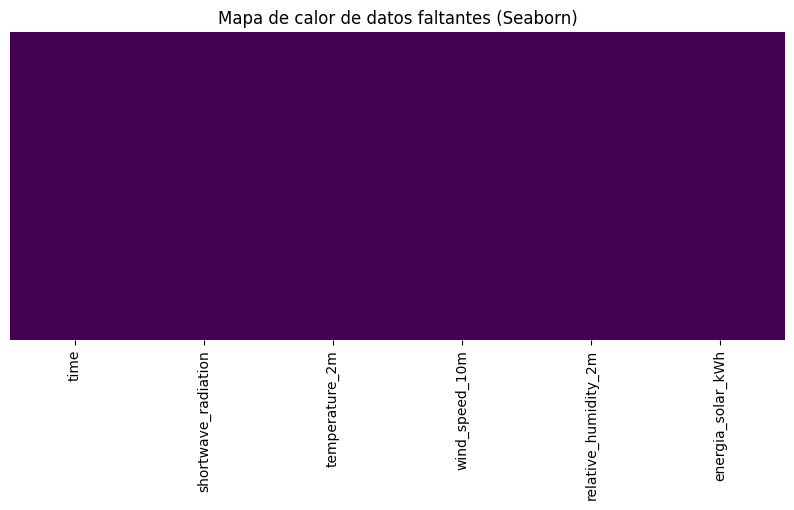

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor con True = faltante
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Mapa de calor de datos faltantes (Seaborn)")
plt.show()


In [ ]:
pip install missingno


In [ ]:
# Diccionario de nombres en inglés a español
nombres_espanol = {
    "time": "tiempo",
    "shortwave_radiation": "radiacion_solar",
    "temperature_2m": "temperatura_2m",
    "wind_speed_10m": "velocidad_viento_10m",
    "relative_humidity_2m": "humedad_relativa_2m",
    "energia_solar_kWh": "energia_solar_kWh"
}

# Renombrar columnas
df.rename(columns=nombres_espanol, inplace=True)

# Verificar nombres actualizados
print("Nuevos nombres de columnas:")
print(df.columns)

Nuevos nombres de columnas:
Index(['tiempo', 'radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m',
       'humedad_relativa_2m', 'energia_solar_kWh'],
      dtype='object')


In [ ]:
print(df.columns.tolist())


['tiempo', 'radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m', 'energia_solar_kWh']


In [ ]:
import numpy as np

# Seleccionar solo las columnas numéricas
num_cols = ['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m', 'energia_solar_kWh']
num_df = df[num_cols]

# --- MÉTODO IQR ---
print("Outliers por IQR:")
for col in num_cols:
    Q1 = num_df[col].quantile(0.25)
    Q3 = num_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = num_df[(num_df[col] < lower) | (num_df[col] > upper)]
    print(f"{col}: {len(outliers)} valores atípicos")

# --- MÉTODO Z-SCORE ---
print("\n Outliers por Z-score (|z| > 3):")
z_scores = (num_df - num_df.mean()) / num_df.std()
for col in num_cols:
    outliers = num_df[np.abs(z_scores[col]) > 3]
    print(f"{col}: {len(outliers)} valores atípicos")

Outliers por IQR:
radiacion_solar: 0 valores atípicos
temperatura_2m: 0 valores atípicos
velocidad_viento_10m: 0 valores atípicos
humedad_relativa_2m: 0 valores atípicos
energia_solar_kWh: 0 valores atípicos

 Outliers por Z-score (|z| > 3):
radiacion_solar: 0 valores atípicos
temperatura_2m: 0 valores atípicos
velocidad_viento_10m: 0 valores atípicos
humedad_relativa_2m: 0 valores atípicos
energia_solar_kWh: 0 valores atípicos


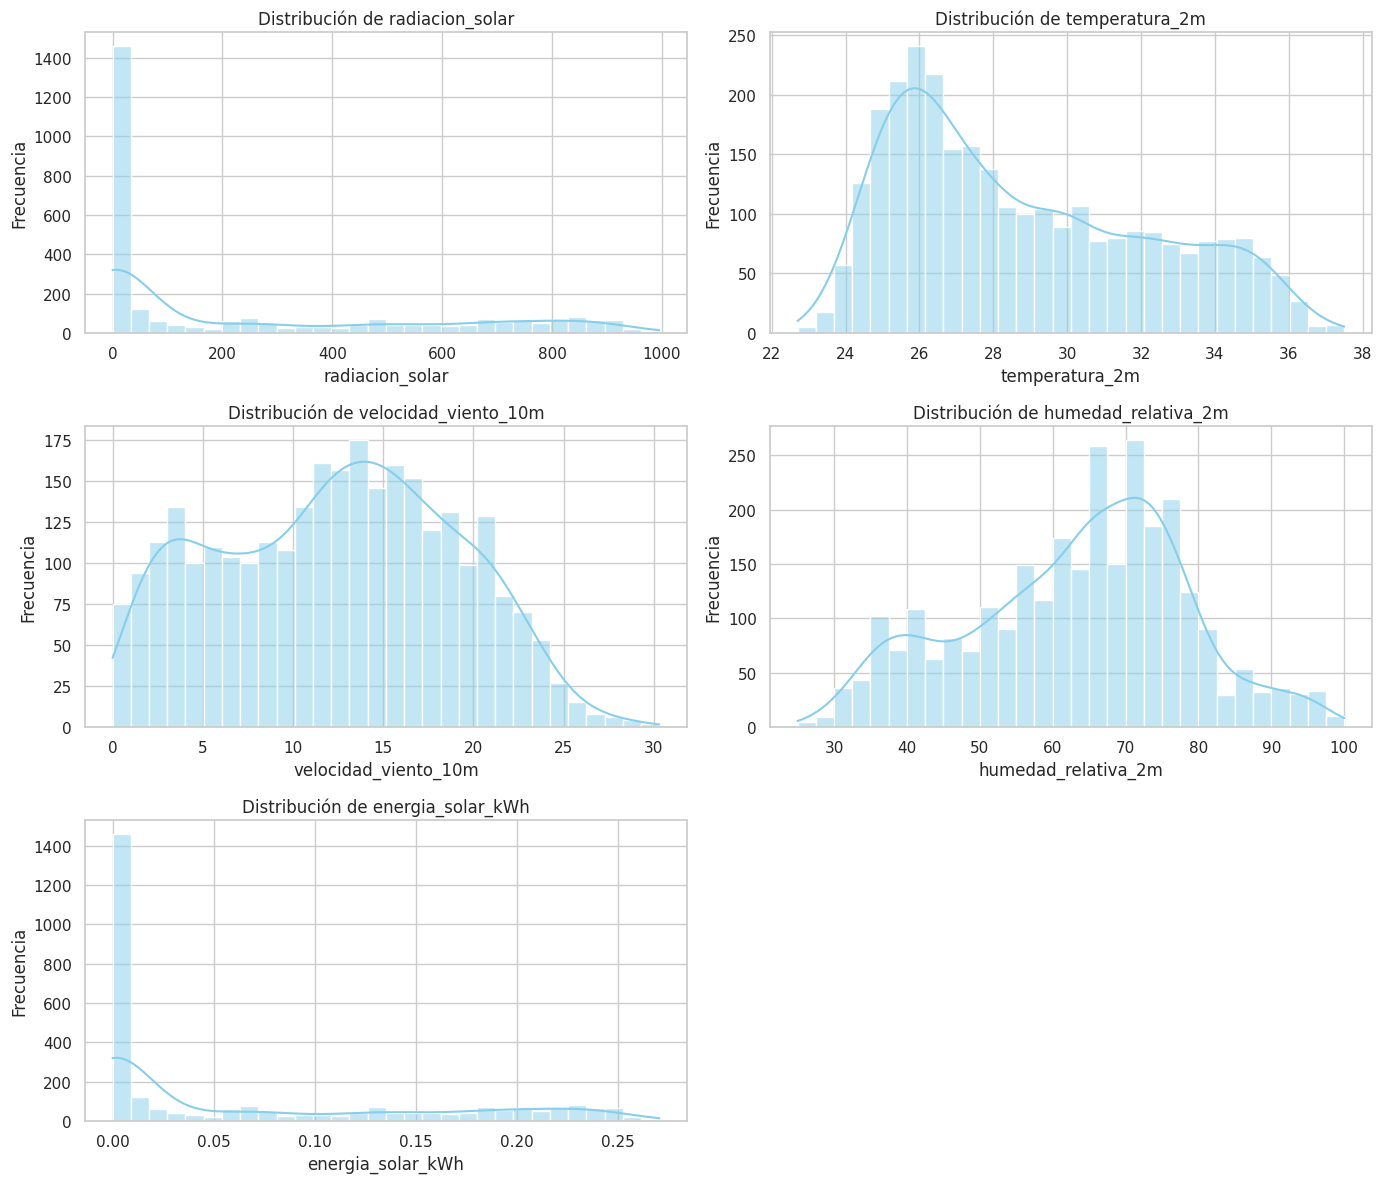

In [ ]:
# Estilo gráfico
sns.set(style="whitegrid")

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Graficar cada variable
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar el subplot vacío si hay número impar de variables
if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Prueba de Shapiro-Wilk
print("Resultados de la prueba de Shapiro-Wilk:\n")
for col in num_cols:
    stat, p = shapiro(df[col].sample(n=500, random_state=42))  # Se toma una muestra si hay muchos datos
    print(f"{col}: estadístico = {stat:.4f}, p-valor = {p:.4f}")
    if p < 0.05:
        print("  → No sigue una distribución normal (se rechaza H0)\n")
    else:
        print("  → Puede considerarse normal (no se rechaza H0)\n")

Resultados de la prueba de Shapiro-Wilk:

radiacion_solar: estadístico = 0.7406, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)

temperatura_2m: estadístico = 0.9257, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)

velocidad_viento_10m: estadístico = 0.9804, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)

humedad_relativa_2m: estadístico = 0.9784, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)

energia_solar_kWh: estadístico = 0.7406, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)



In [ ]:

from scipy.stats import skew, kurtosis

# Cálculo de asimetría y curtosis
print("Asimetría y Curtosis de las variables:\n")
for col in num_cols:
    col_skew = skew(df[col].dropna())
    col_kurt = kurtosis(df[col].dropna(), fisher=True)  # Fisher=True devuelve curtosis normalizada (0 = normal)
    print(f"{col}:")
    print(f"  → Asimetría: {col_skew:.4f}")
    print(f"  → Curtosis: {col_kurt:.4f}\n")

Asimetría y Curtosis de las variables:

radiacion_solar:
  → Asimetría: 0.8827
  → Curtosis: -0.8206

temperatura_2m:
  → Asimetría: 0.5514
  → Curtosis: -0.8437

velocidad_viento_10m:
  → Asimetría: -0.0122
  → Curtosis: -0.8948

humedad_relativa_2m:
  → Asimetría: -0.2377
  → Curtosis: -0.4759

energia_solar_kWh:
  → Asimetría: 0.8827
  → Curtosis: -0.8206



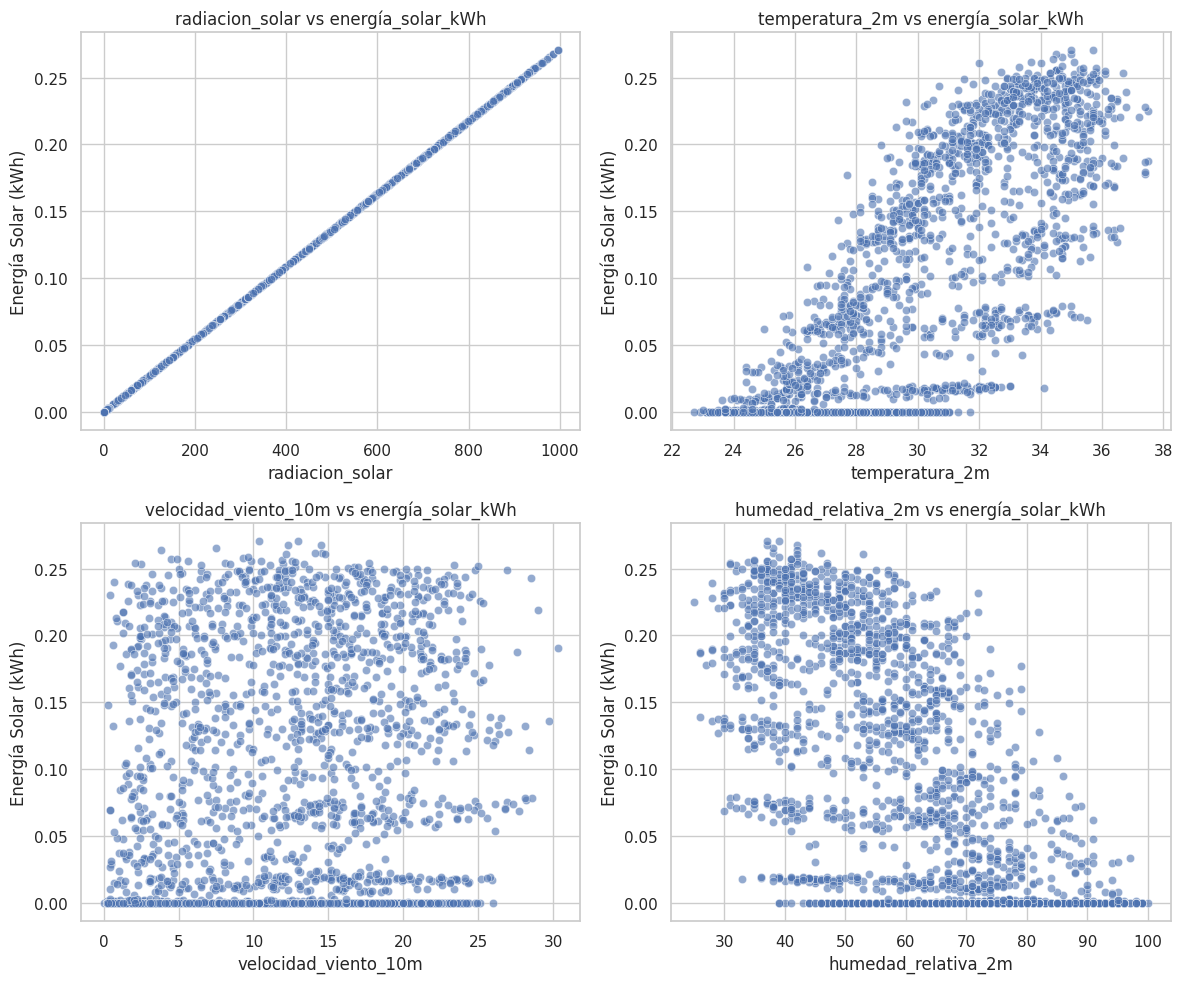

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Lista de predictores
predictors = ['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m']

# Crear gráficos de dispersión
plt.figure(figsize=(12, 10))
for i, col in enumerate(predictors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y='energia_solar_kWh', alpha=0.6)
    plt.title(f'{col} vs energía_solar_kWh')
    plt.xlabel(col)
    plt.ylabel('Energía Solar (kWh)')

plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd
from scipy.stats import spearmanr

# Variables predictoras y objetivo
predictors = ['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m']
target = 'energia_solar_kWh'

# Calcular correlaciones de Spearman
results = []
for col in predictors:
    spearman_corr, _ = spearmanr(df[col], df[target])
    results.append((col, spearman_corr))

# Mostrar resultados
spearman_df = pd.DataFrame(results, columns=['Variable', 'Spearman Correlation'])
print(spearman_df)


               Variable  Spearman Correlation
0       radiacion_solar              1.000000
1        temperatura_2m              0.769696
2  velocidad_viento_10m              0.050954
3   humedad_relativa_2m             -0.626942


In [ ]:
pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from scipy.stats import spearmanr
import dcor


# Calcular Spearman y Distance Correlation
results = []
for col in predictors:
    spearman_corr, _ = spearmanr(df[col], df[target])
    distance_corr = dcor.distance_correlation(df[col], df[target])
    results.append((col, spearman_corr, distance_corr))

# Resultados como tabla
correlation_df = pd.DataFrame(results, columns=['Variable', 'Spearman Correlation', 'Distance Correlation'])
print(correlation_df)


               Variable  Spearman Correlation  Distance Correlation
0       radiacion_solar              1.000000              1.000000
1        temperatura_2m              0.769696              0.807122
2  velocidad_viento_10m              0.050954              0.070205
3   humedad_relativa_2m             -0.626942              0.652120


/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


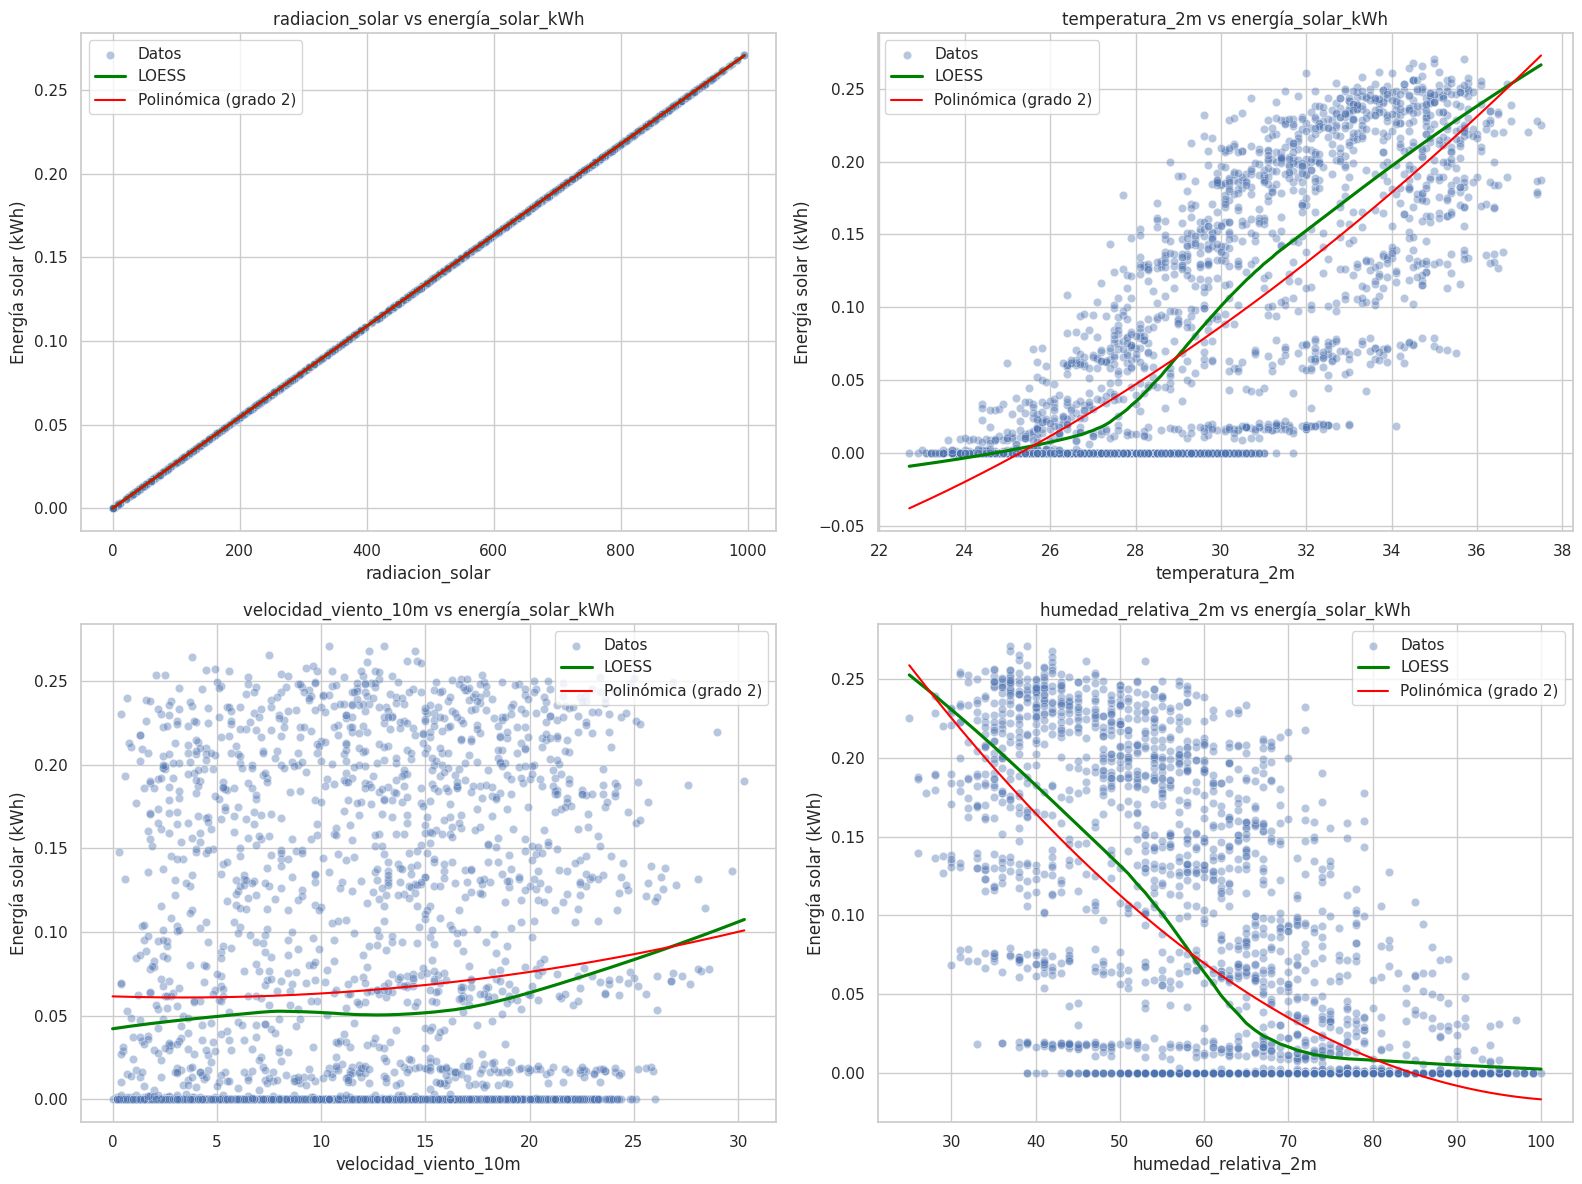

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Crear subplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(predictors, 1):
    plt.subplot(2, 2, i)

    # Scatter
    sns.scatterplot(x=df[col], y=df[target], alpha=0.4, label='Datos')

    # LOESS con seaborn (lowess=True)
    sns.regplot(x=col, y=target, data=df, lowess=True, scatter=False, label='LOESS', color='green')

    # Ajuste polinómico grado 2
    X_poly = PolynomialFeatures(degree=2).fit_transform(df[[col]])
    model = LinearRegression().fit(X_poly, df[target])
    y_pred = model.predict(X_poly)

    # Ordenar para graficar
    sorted_idx = np.argsort(df[col])
    plt.plot(df[col].values[sorted_idx], y_pred[sorted_idx], color='red', label='Polinómica (grado 2)')

    plt.title(f'{col} vs energía_solar_kWh')
    plt.xlabel(col)
    plt.ylabel('Energía solar (kWh)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


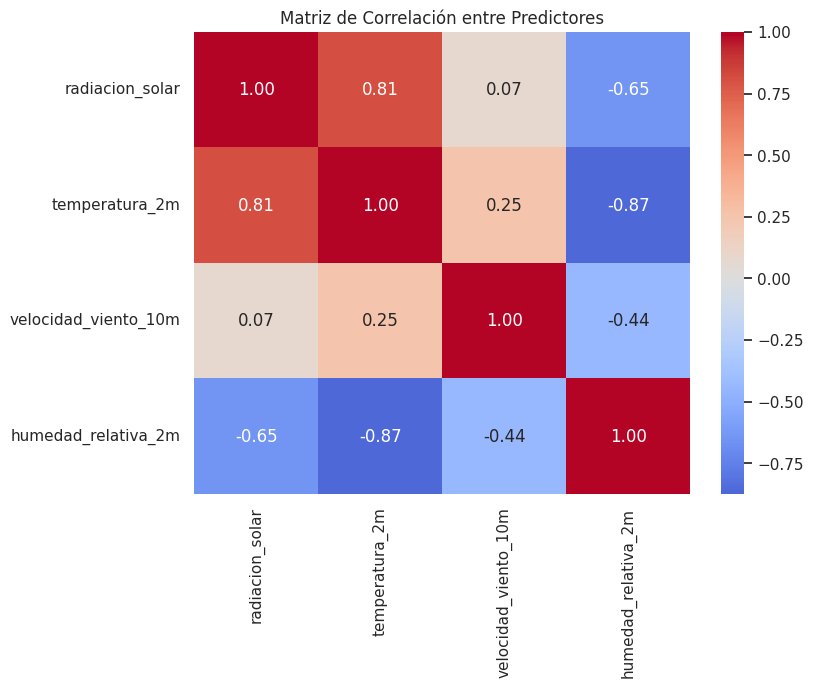

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = df[predictors].corr()

# Visualizar la matriz como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlación entre Predictores")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Solo predictores
X = df[['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m']]

# Calcular VIF
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(X.shape[1])]

# Mostrar variables con VIF > 10
print("Variables con VIF mayor a 10 (posible multicolinealidad):")
print(vif_data[vif_data["VIF"] > 10])

# Identificar variables redundantes por correlación alta
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

print("\n Pares de variables con correlación > 0.9 (redundancia):")
for col in upper.columns:
    for row in upper.index:
        if upper.loc[row, col] > 0.9:
            print(f"{row} y {col} → correlación = {upper.loc[row, col]:.2f}")

Variables con VIF mayor a 10 (posible multicolinealidad):
Empty DataFrame
Columns: [Variable, VIF]
Index: []

 Pares de variables con correlación > 0.9 (redundancia):


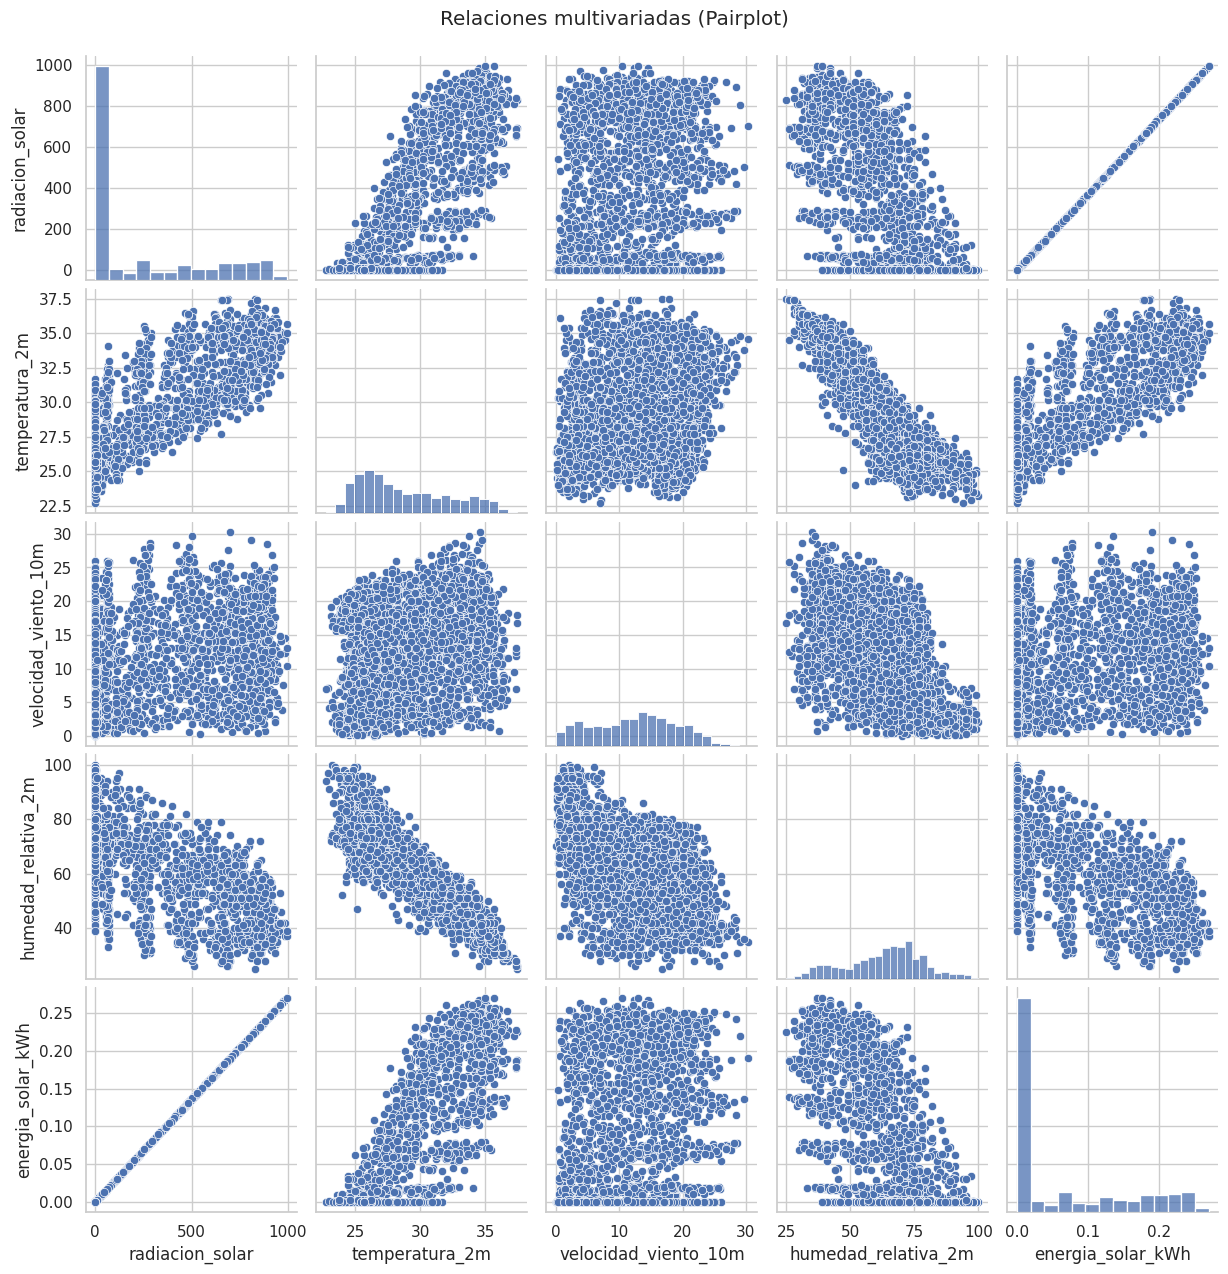

In [ ]:
sns.pairplot(df[['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m', 'energia_solar_kWh']])
plt.suptitle("Relaciones multivariadas (Pairplot)", y=1.02)
plt.show()


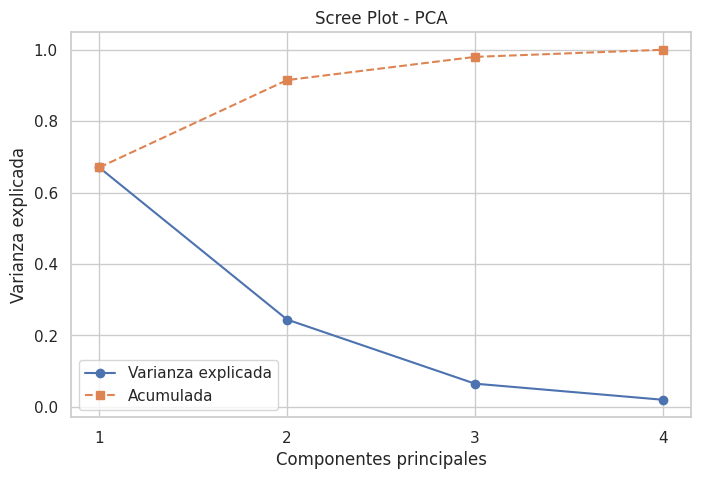

Cargas factoriales (PCA):
                         PC1     PC2     PC3     PC4
radiacion_solar       0.5151 -0.3926  0.7122 -0.2708
temperatura_2m        0.5840 -0.1629 -0.2218  0.7637
velocidad_viento_10m  0.2589  0.8981  0.3432  0.0932
humedad_relativa_2m  -0.5715 -0.1135  0.5707  0.5786


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Seleccionar solo las variables predictoras
X = df[['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m']]

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', label='Varianza explicada')
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='s', linestyle='--', label='Acumulada')
plt.title('Scree Plot - PCA')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()

# Mostrar cargas factoriales
cargas = pd.DataFrame(pca.components_.T,
                      columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                      index=X.columns)
print("Cargas factoriales (PCA):")
print(cargas.round(4))




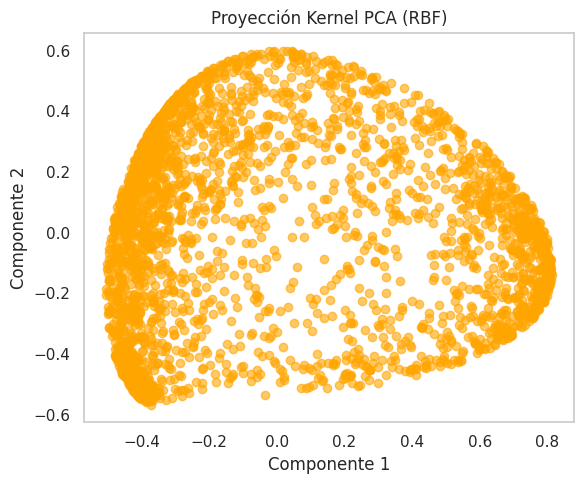

In [ ]:
from sklearn.decomposition import KernelPCA

# Kernel PCA con RBF (no lineal)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(6, 5))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='orange', alpha=0.6)
plt.title('Proyección Kernel PCA (RBF)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.tight_layout()
plt.show()


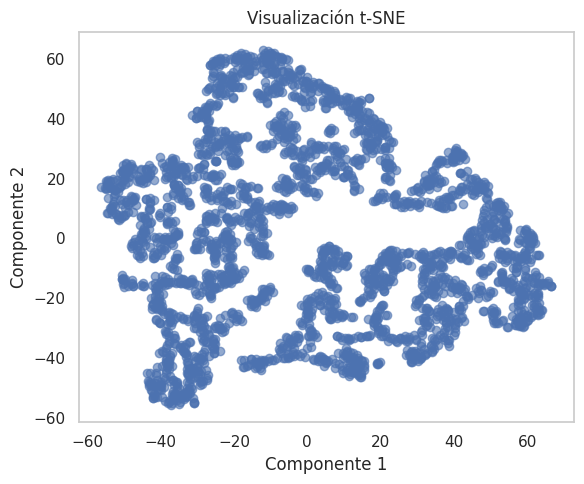

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)
plt.title('Visualización t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


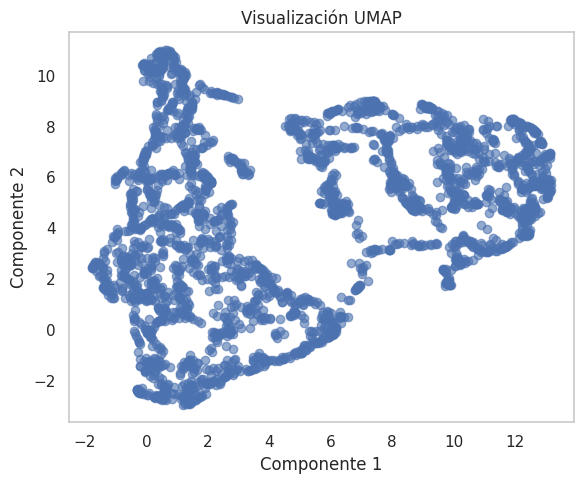

In [ ]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6)
plt.title('Visualización UMAP')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.tight_layout()
plt.show()
